In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv(r"D:\Praveen_Chandran\ml problerm\train.csv")

In [3]:
train.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


## some cleaning


In [4]:
train['devid'].unique()

array([nan, 'Desktop', 'Mobile', 'Tablet'], dtype=object)

In [5]:
train['browserid'] = train['browserid'].str.replace('Google Chrome','Chrome')

In [6]:
train['browserid'] = train['browserid'].str.replace('Mozilla Firefox', 'Firefox')

In [7]:
train['browserid']= train['browserid'].str.replace('Mozilla', 'Firefox')

In [8]:
train['browserid']= train['browserid'].str.replace('InternetExplorer', 'IE')

In [9]:
train['browserid']= train['browserid'].str.replace('Internet Explorer', 'IE')

In [10]:
train['browserid'].unique()

array(['Firefox', 'Edge', 'Chrome', nan, 'IE', 'Opera', 'Safari'],
      dtype=object)

In [11]:
train['device'] = train['devid']

In [12]:
train.drop('devid',axis = 'columns',inplace = True)

In [13]:
train['device'].unique()

array([nan, 'Desktop', 'Mobile', 'Tablet'], dtype=object)

In [14]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [15]:
train['hour'] = train['datetime'].dt.hour
train['minutes'] = train['datetime'].dt.minute
train['seconds'] =  train['datetime'].dt.second
train['day_of_week'] = train['datetime'].dt.dayofweek
train['week_end'] = train['day_of_week'].apply(lambda x:'weekend' if x==0 or x==6 else 'weekday')

In [16]:
def hour_status(hour):
    if  5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [17]:
train['hour_status'] = train['hour'].apply(lambda x: hour_status(x))

In [18]:
train.drop('datetime',axis = 'columns',inplace = True)

In [19]:
train.head()

,ID,siteid,offerid,category,merchant,countrycode,browserid,click,device,hour,minutes,seconds,day_of_week,week_end,hour_status
0,IDsrk7SoW,4709696.0,887235,17714,20301556,e,Firefox,0,NaN,9,42,9,5,weekday,morning
1,IDmMSxHur,5189467.0,178235,21407,9434818,b,Firefox,0,Desktop,17,50,53,2,weekday,evening
2,IDVLNN0Ut,98480.0,518539,25085,2050923,a,Edge,0,NaN,12,46,49,2,weekday,afternoon
3,ID32T6wwQ,8896401.0,390352,40339,72089744,c,Firefox,0,Mobile,10,18,43,1,weekday,morning
4,IDqUShzMg,5635120.0,472937,12052,39507200,d,Firefox,0,Desktop,16,2,33,5,weekday,afternoon


In [20]:
train['hour'].unique()

array([ 9, 17, 12, 10, 16, 13,  5, 11,  3, 14, 21, 15,  6, 19,  2, 18,  7,
        8,  4, 23,  0,  1, 20, 22])

### EDA

In [21]:
numerical_feature = [feature for feature in train.columns if train[feature].dtypes !='O']

In [22]:
categorical_feature = [feature for feature in train.columns if train[feature].dtypes == 'O']

In [23]:
date_features = ['hour','minutes','seconds','day_of_week','week_end','hour_status']

In [24]:
timeseries_feature = [feature for feature in train.columns if feature in date_features]

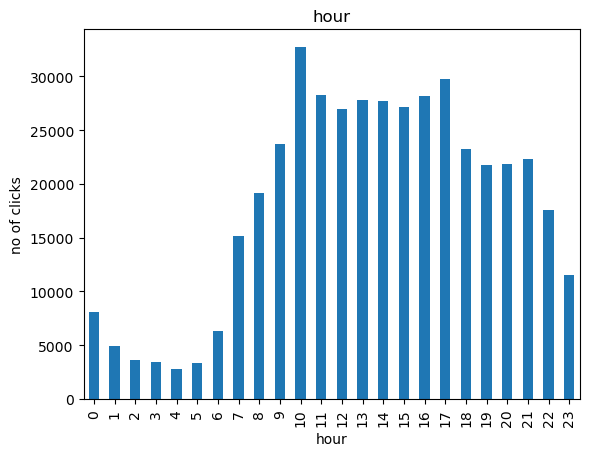

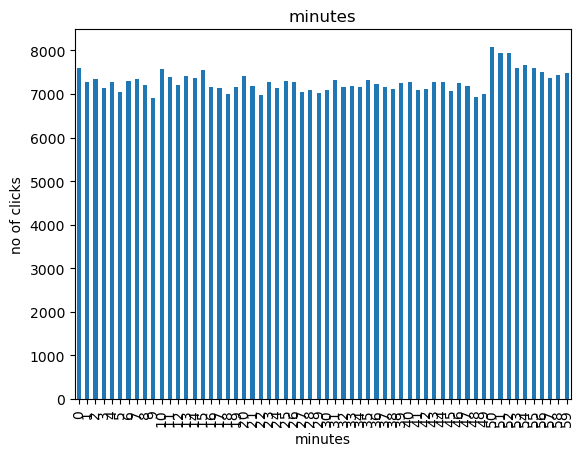

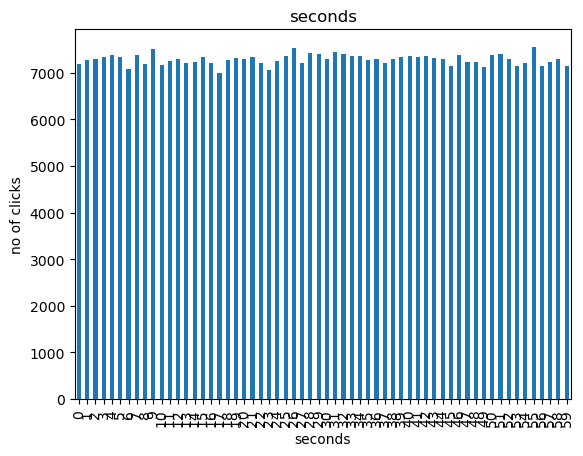

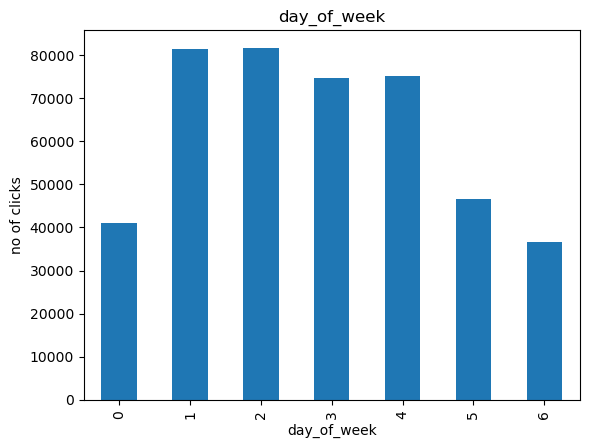

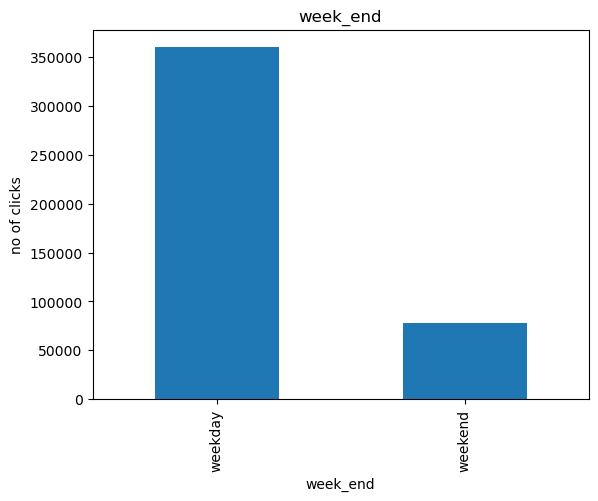

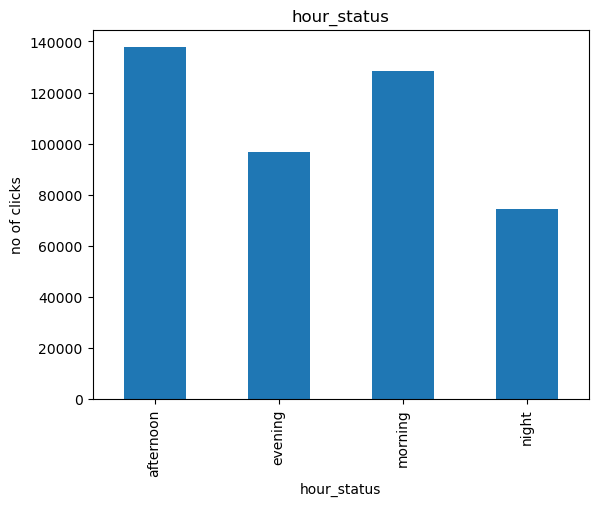

In [25]:
for i in train[timeseries_feature]:
    train.groupby(i)['click'].sum().plot.bar()
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('no of clicks')
    plt.show()

In [26]:
train.groupby('week_end')['click'].sum()

week_end
weekday    359606
weekend     77608
Name: click, dtype: int64

<Axes: xlabel='browserid'>

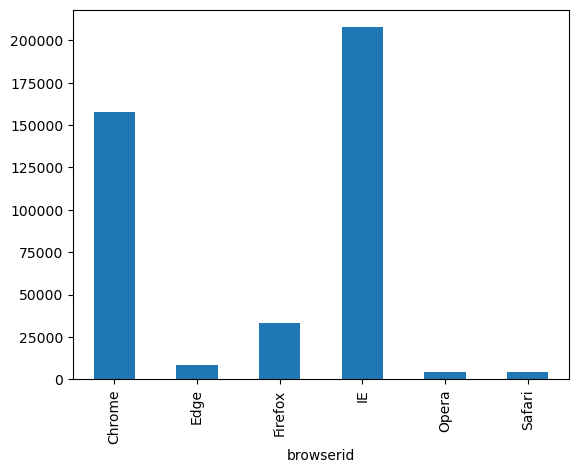

In [27]:
train.groupby('browserid')['click'].sum().plot.bar()

<Axes: xlabel='device'>

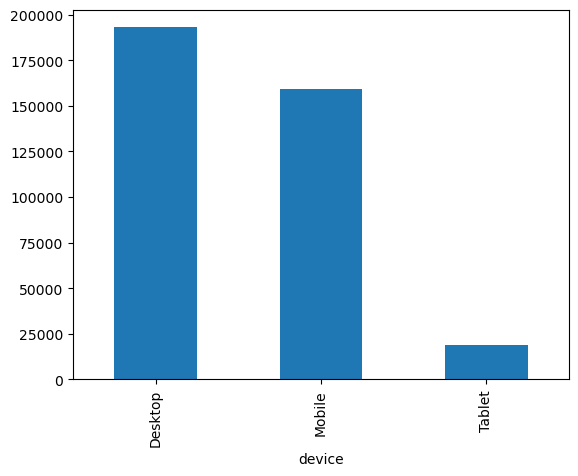

In [28]:
train.groupby('device')['click'].sum().plot.bar()

<Axes: xlabel='countrycode'>

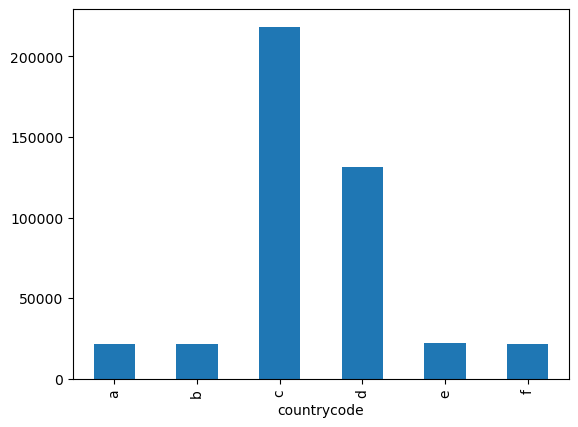

In [29]:
train.groupby('countrycode')['click'].sum().plot.bar()

In [30]:
for feature in numerical_feature:
    print('feature : {} and no of null values : {}'.format(feature,train[feature].isnull().sum()))
    #print('feature : {} and no of null values : {}'.format(feature,train[feature].isnull().sum()))

feature : siteid and no of null values : 1212515
feature : offerid and no of null values : 0
feature : category and no of null values : 0
feature : merchant and no of null values : 0
feature : click and no of null values : 0
feature : hour and no of null values : 0
feature : minutes and no of null values : 0
feature : seconds and no of null values : 0
feature : day_of_week and no of null values : 0


In [31]:
for feature in categorical_feature:
    print('feature : {} and no of null values : {}'.format(feature,train[feature].isnull().sum()))

feature : ID and no of null values : 0
feature : countrycode and no of null values : 0
feature : browserid and no of null values : 608327
feature : device and no of null values : 1820299
feature : week_end and no of null values : 0
feature : hour_status and no of null values : 0


In [32]:
train.groupby(np.where(train['siteid'].isnull(),1,0))['click'].sum()

0    393707
1     43507
Name: click, dtype: int64

In [33]:
train.groupby(np.where(train['siteid'].isnull(),1,0))['click'].mean()

0    0.036036
1    0.035882
Name: click, dtype: float64

In [34]:
train.groupby(np.where(train['browserid'].isnull(),1,0))['click'].mean()

0    0.036038
1    0.035695
Name: click, dtype: float64

In [35]:
train.groupby(np.where(train['browserid'].isnull(),1,0))['click'].sum()

0    415500
1     21714
Name: click, dtype: int64

In [36]:
train.groupby(np.where(train['device'].isnull(),1,0))['click'].mean()

0    0.035976
1    0.036276
Name: click, dtype: float64

In [37]:
train.groupby(np.where(train['device'].isnull(),1,0))['click'].sum()

0    371181
1     66033
Name: click, dtype: int64

In [38]:
train.head()

,ID,siteid,offerid,category,merchant,countrycode,browserid,click,device,hour,minutes,seconds,day_of_week,week_end,hour_status
0,IDsrk7SoW,4709696.0,887235,17714,20301556,e,Firefox,0,NaN,9,42,9,5,weekday,morning
1,IDmMSxHur,5189467.0,178235,21407,9434818,b,Firefox,0,Desktop,17,50,53,2,weekday,evening
2,IDVLNN0Ut,98480.0,518539,25085,2050923,a,Edge,0,NaN,12,46,49,2,weekday,afternoon
3,ID32T6wwQ,8896401.0,390352,40339,72089744,c,Firefox,0,Mobile,10,18,43,1,weekday,morning
4,IDqUShzMg,5635120.0,472937,12052,39507200,d,Firefox,0,Desktop,16,2,33,5,weekday,afternoon


### handelling null values


In [39]:
train['siteid'] = train['siteid'].fillna('-999')
train['browserid'] = train['browserid'].fillna('unknown')

In [40]:
train['device'] = train['device'].fillna('missing')

In [41]:
train['click'].value_counts()

click
0    11700596
1      437214
Name: count, dtype: int64

#### label encoding

In [42]:
train.head()

,ID,siteid,offerid,category,merchant,countrycode,browserid,click,device,hour,minutes,seconds,day_of_week,week_end,hour_status
0,IDsrk7SoW,4709696.0,887235,17714,20301556,e,Firefox,0,missing,9,42,9,5,weekday,morning
1,IDmMSxHur,5189467.0,178235,21407,9434818,b,Firefox,0,Desktop,17,50,53,2,weekday,evening
2,IDVLNN0Ut,98480.0,518539,25085,2050923,a,Edge,0,missing,12,46,49,2,weekday,afternoon
3,ID32T6wwQ,8896401.0,390352,40339,72089744,c,Firefox,0,Mobile,10,18,43,1,weekday,morning
4,IDqUShzMg,5635120.0,472937,12052,39507200,d,Firefox,0,Desktop,16,2,33,5,weekday,afternoon


In [43]:
mean_encoding = ['siteid','offerid','category','merchant']
for feature in mean_encoding:
   mean_encoded_feature = train.groupby(feature)['click'].mean().to_dict()
   train[feature] = train[feature].map(mean_encoded_feature)
    #print(feature)

In [44]:
#train.groupby('siteid')['click'].mean().to_dict()
train.head()

,ID,siteid,offerid,category,merchant,countrycode,browserid,click,device,hour,minutes,seconds,day_of_week,week_end,hour_status
0,IDsrk7SoW,0.013966,0.009398,0.025282,0.035296,e,Firefox,0,missing,9,42,9,5,weekday,morning
1,IDmMSxHur,0.000000,0.008865,0.026070,0.015654,b,Firefox,0,Desktop,17,50,53,2,weekday,evening
2,IDVLNN0Ut,0.000000,0.000000,0.034097,0.022760,a,Edge,0,missing,12,46,49,2,weekday,afternoon
3,ID32T6wwQ,0.015323,0.000000,0.013608,0.037653,c,Firefox,0,Mobile,10,18,43,1,weekday,morning
4,IDqUShzMg,0.002331,0.000000,0.049339,0.022627,d,Firefox,0,Desktop,16,2,33,5,weekday,afternoon


In [45]:
train.groupby('siteid')['click'].mean()

siteid
0.000000    0.000000
0.000150    0.000150
0.000167    0.000167
0.000178    0.000178
0.000180    0.000180
              ...   
0.961538    0.961538
0.967742    0.967742
0.968750    0.968750
0.979167    0.979167
1.000000    1.000000
Name: click, Length: 5535, dtype: float64

In [46]:
train[['B','C','D','E','F']] = pd.get_dummies(train['countrycode'],dtype = int,drop_first = True)

In [47]:
train.drop({'countrycode','ID'},axis = 'columns',inplace = True)

In [48]:
train.head()

,siteid,offerid,category,merchant,browserid,click,device,hour,minutes,seconds,day_of_week,week_end,hour_status,B,C,D,E,F
0,0.013966,0.009398,0.025282,0.035296,Firefox,0,missing,9,42,9,5,weekday,morning,0,0,0,1,0
1,0.000000,0.008865,0.026070,0.015654,Firefox,0,Desktop,17,50,53,2,weekday,evening,1,0,0,0,0
2,0.000000,0.000000,0.034097,0.022760,Edge,0,missing,12,46,49,2,weekday,afternoon,0,0,0,0,0
3,0.015323,0.000000,0.013608,0.037653,Firefox,0,Mobile,10,18,43,1,weekday,morning,0,1,0,0,0
4,0.002331,0.000000,0.049339,0.022627,Firefox,0,Desktop,16,2,33,5,weekday,afternoon,0,0,1,0,0


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
label_encoding = ['hour','minutes','seconds','day_of_week','week_end','hour_status']
for feature in label_encoding:
    train[feature] = le.fit_transform(train[feature])

In [51]:
train[['Edge','Firefox','IE','Opera','Safari','unknown']] =  pd.get_dummies(train['browserid'],drop_first = True,dtype = int)

In [52]:
train[['Mobile','Tablet','missing']] = pd.get_dummies(train['device'],drop_first = True,dtype = int)

In [53]:
train['minutes'].unique()

array([42, 50, 46, 18,  2,  8,  7, 58,  0, 38,  6, 36, 52, 43, 11, 39, 28,
       26, 10, 45,  1, 33,  4, 31, 25, 59, 51,  5, 17, 54, 41, 47, 21, 12,
       13, 55, 56, 22, 15, 30,  9, 53, 16, 48, 49, 19, 27, 29, 35, 14, 44,
       37, 40, 23, 24, 20, 57, 34,  3, 32], dtype=int64)

In [54]:
train.drop({'browserid','device'},axis = 'columns',inplace = True)

### handelling imbalanced dataset

In [55]:
train['click'].value_counts()

click
0    11700596
1      437214
Name: count, dtype: int64

In [56]:
target = train['click']

In [57]:
majority = train[train['click']==0]
minority = train[train['click']==1]

In [58]:
minority.shape
#majority.shape

(437214, 25)

In [59]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [60]:
X = train.drop('click',axis = 'columns')

In [61]:
Y = train['click']

In [62]:
X_res,Y_res = nm.fit_resample(X,Y)

In [63]:
train2 = pd.concat([X_res,Y_res],axis = 'columns')

In [64]:
train2.head()

,siteid,offerid,category,merchant,hour,minutes,seconds,day_of_week,week_end,hour_status,...,Edge,Firefox,IE,Opera,Safari,unknown,Mobile,Tablet,missing,click
0,0.130495,0.002475,0.025040,0.020626,23,19,3,1,0,3,...,0,0,1,0,0,0,0,0,0,0
1,0.130495,0.000000,0.025040,0.035296,20,52,20,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.000000,0.043478,0.042724,0.033162,18,18,39,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.035882,0.007105,0.025040,0.024235,9,57,42,3,0,2,...,0,0,0,0,0,0,1,0,0,0
4,0.052419,0.005970,0.013608,0.006310,12,50,28,4,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874428 entries, 0 to 874427
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   siteid       874428 non-null  float64
 1   offerid      874428 non-null  float64
 2   category     874428 non-null  float64
 3   merchant     874428 non-null  float64
 4   hour         874428 non-null  int64  
 5   minutes      874428 non-null  int64  
 6   seconds      874428 non-null  int64  
 7   day_of_week  874428 non-null  int64  
 8   week_end     874428 non-null  int32  
 9   hour_status  874428 non-null  int32  
 10  B            874428 non-null  int32  
 11  C            874428 non-null  int32  
 12  D            874428 non-null  int32  
 13  E            874428 non-null  int32  
 14  F            874428 non-null  int32  
 15  Edge         874428 non-null  int32  
 16  Firefox      874428 non-null  int32  
 17  IE           874428 non-null  int32  
 18  Opera        874428 non-

In [66]:
train.head()

,siteid,offerid,category,merchant,click,hour,minutes,seconds,day_of_week,week_end,...,F,Edge,Firefox,IE,Opera,Safari,unknown,Mobile,Tablet,missing
0,0.013966,0.009398,0.025282,0.035296,0,9,42,9,5,0,...,0,0,1,0,0,0,0,0,0,1
1,0.000000,0.008865,0.026070,0.015654,0,17,50,53,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0.000000,0.000000,0.034097,0.022760,0,12,46,49,2,0,...,0,1,0,0,0,0,0,0,0,1
3,0.015323,0.000000,0.013608,0.037653,0,10,18,43,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0.002331,0.000000,0.049339,0.022627,0,16,2,33,5,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
train2.head()

,siteid,offerid,category,merchant,hour,minutes,seconds,day_of_week,week_end,hour_status,...,Edge,Firefox,IE,Opera,Safari,unknown,Mobile,Tablet,missing,click
0,0.130495,0.002475,0.025040,0.020626,23,19,3,1,0,3,...,0,0,1,0,0,0,0,0,0,0
1,0.130495,0.000000,0.025040,0.035296,20,52,20,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.000000,0.043478,0.042724,0.033162,18,18,39,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.035882,0.007105,0.025040,0.024235,9,57,42,3,0,2,...,0,0,0,0,0,0,1,0,0,0
4,0.052419,0.005970,0.013608,0.006310,12,50,28,4,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
train2['siteid'].value_counts()[0]

71429

### Feature Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [71]:
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [72]:
train2.columns

Index(['siteid', 'offerid', 'category', 'merchant', 'hour', 'minutes',
       'seconds', 'day_of_week', 'week_end', 'hour_status', 'B', 'C', 'D', 'E',
       'F', 'Edge', 'Firefox', 'IE', 'Opera', 'Safari', 'unknown', 'Mobile',
       'Tablet', 'missing', 'click'],
      dtype='object')

In [73]:
train2.head()

,siteid,offerid,category,merchant,hour,minutes,seconds,day_of_week,week_end,hour_status,...,Edge,Firefox,IE,Opera,Safari,unknown,Mobile,Tablet,missing,click
0,0.130495,0.002475,0.025040,0.020626,23,19,3,1,0,3,...,0,0,1,0,0,0,0,0,0,0
1,0.130495,0.000000,0.025040,0.035296,20,52,20,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.000000,0.043478,0.042724,0.033162,18,18,39,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.035882,0.007105,0.025040,0.024235,9,57,42,3,0,2,...,0,0,0,0,0,0,1,0,0,0
4,0.052419,0.005970,0.013608,0.006310,12,50,28,4,0,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
scaling_var = ['siteid', 'offerid', 'category', 'merchant', 'hour', 'minutes',
       'seconds', 'day_of_week', 'week_end', 'hour_status']

In [75]:
for feature in scaling_var:
    model = ss.fit(train2[[feature]])
    train2[feature] = model.transform(train2[[feature]])

train2.head()

#### feature selection

In [76]:
len(train2.columns)

25

#### model training


In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [78]:
train2.head()

,siteid,offerid,category,merchant,hour,minutes,seconds,day_of_week,week_end,hour_status,...,Edge,Firefox,IE,Opera,Safari,unknown,Mobile,Tablet,missing,click
0,-0.338023,-0.670048,-0.419068,-0.476396,2.155174,-0.640340,-1.541205,-1.111547,-0.369785,1.896858,...,0,0,1,0,0,0,0,0,0,0
1,-0.338023,-0.681382,-0.419068,-0.206656,1.466926,1.266857,-0.555248,-1.111547,-0.369785,-0.047085,...,0,0,1,0,0,0,0,0,0,0
2,-0.655823,-0.482299,0.013685,-0.245883,1.008094,-0.698134,0.546704,-1.111547,-0.369785,-0.047085,...,0,0,0,0,0,0,1,0,0,0
3,-0.568439,-0.648850,-0.419068,-0.410040,-1.056650,1.555827,0.720696,0.132122,-0.369785,0.924886,...,0,0,0,0,0,0,1,0,0,0
4,-0.528164,-0.654047,-0.698796,-0.739641,-0.368402,1.151270,-0.091269,0.753957,-0.369785,-1.019057,...,0,0,0,0,0,0,1,0,0,0


In [79]:
X = train2.drop('click',axis = 'columns')

In [80]:
Y = train2['click']

In [81]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [82]:
x_test.shape

(218607, 24)

In [85]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [86]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [87]:
xgb_model.score(x_test,y_test)

0.9500930894253158